# Python Project: Germany New Cars Data Analysis & Visualization

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Loading the data in the dataframe

In [32]:
df = pd.read_csv("Germany New Car Data.csv", encoding='ISO-8859-1')

In [33]:
# Display the first few rows
df.head()

,Purchase ID,Customer Name,Age,Gender,City,Car Brand,Car Model,Fuel Type,Transmission,Purchase Date,Price,Loan Taken,Down Payment,Loan Provider,Annual Income,Previous Car Owned,Customer Satisfaction Score
0,PUR100000,Laura,28,Male,Munich,BMW,C-Class,Petrol,Automatic,10/6/2021," 15,725.19",Yes," 5,004.00",Commerzbank," 62,770.00",Yes,2
1,PUR100001,Tim,54,Female,Stuttgart,BMW,A3,Electric,Automatic,7/10/2021," 37,264.71",Yes," 11,930.00",Commerzbank," 53,283.00",No,4
2,PUR100002,Lukas,42,Male,Hamburg,Opel,Octavia,Petrol,Manual,9/13/2021," 48,946.14",No," 8,263.00",Commerzbank," 78,976.00",Yes,4
3,PUR100003,Sophie,26,Female,Berlin,Audi,Golf,Petrol,Manual,9/5/2021," 23,009.41",No," 12,359.00",Commerzbank," 84,191.00",No,4
4,PUR100004,Lukas,40,Female,Berlin,Audi,C-Class,Diesel,Manual,8/18/2021," 12,942.71",No," 3,635.00",Volksbank," 30,924.00",No,3


In [34]:
# To Confirm there's no null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19617 entries, 0 to 19616
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Purchase ID                  19617 non-null  object
 1   Customer Name                19617 non-null  object
 2   Age                          19617 non-null  int64 
 3   Gender                       19617 non-null  object
 4   City                         19617 non-null  object
 5   Car Brand                    19617 non-null  object
 6   Car Model                    19617 non-null  object
 7   Fuel Type                    19617 non-null  object
 8   Transmission                 19617 non-null  object
 9   Purchase Date                19617 non-null  object
 10  Price                        19617 non-null  object
 11  Loan Taken                   19617 non-null  object
 12  Down Payment                 19617 non-null  object
 13  Loan Provider                17

## Q1. What is the distribution of car purchases by city?

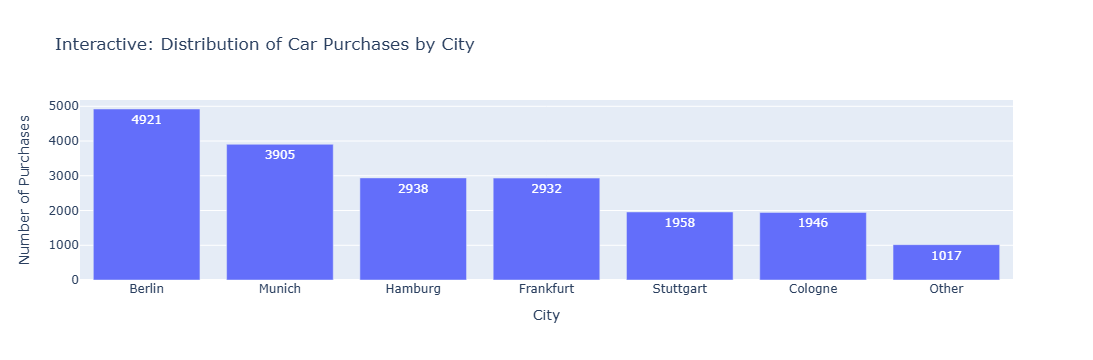

In [9]:
# Group and count purchases by city
city_count = df['City'].value_counts().reset_index()
city_count.columns = ['City', 'Number of Purchases']

# Create interactive bar chart
fig = px.bar(
    city_count,
    x='City',
    y='Number of Purchases',
    title='Interactive: Distribution of Car Purchases by City',
    labels={'Number of Purchases': 'Number of Purchases'},
    text='Number of Purchases'
)

# Save the interactive chart as PNG
fig.write_image("Car Purchases By City.png", width=1000, height=600, scale=2)

# Show chart
fig.show()

## Q2. Which car brands are most popular?

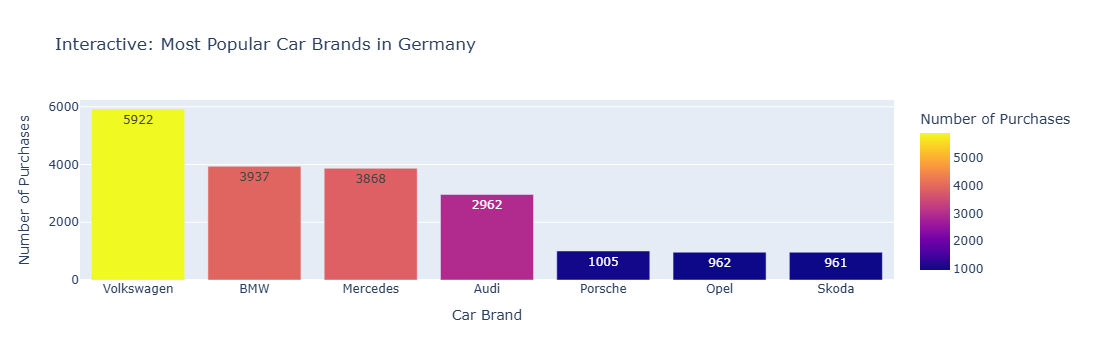

In [8]:
# Count car brand popularity
brand_count = df['Car Brand'].value_counts().reset_index()
brand_count.columns = ['Car Brand', 'Number of Purchases']

# Create interactive bar chart
fig = px.bar(
    brand_count,
    x='Car Brand',
    y='Number of Purchases',
    title='Interactive: Most Popular Car Brands in Germany',
    text='Number of Purchases',
    color='Number of Purchases'
)

# Save the interactive chart
fig.write_image("Top Popular Car Brands.png", width=1000, height=600, scale=2)

# Show chart
fig.show()

## Q3. What is the trend of car purchases over time?

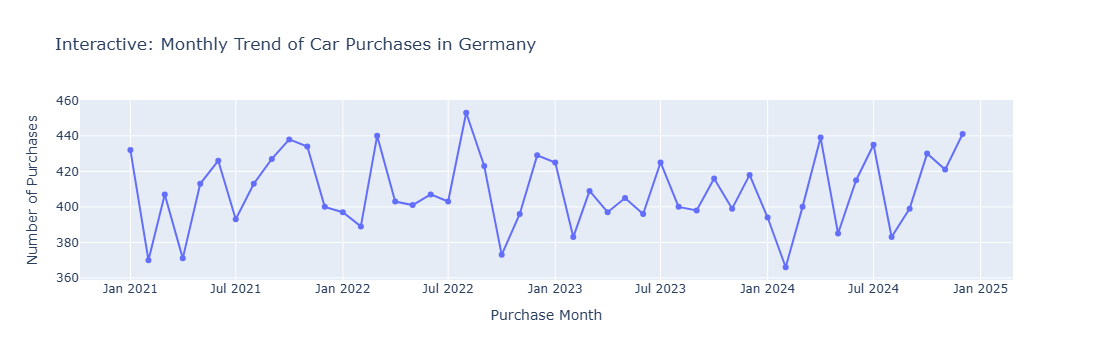

In [13]:
# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')

# Create a new column with just the month
df['Purchase Month'] = df['Purchase Date'].dt.to_period('M').astype(str)

# Group by month and count
monthly_counts = df['Purchase Month'].value_counts().reset_index()
monthly_counts.columns = ['Purchase Month', 'Number of Purchases']
monthly_counts = monthly_counts.sort_values(by='Purchase Month')

# Plot with Plotly
fig = px.line(
    monthly_counts,
    x='Purchase Month',
    y='Number of Purchases',
    title='Interactive: Monthly Trend of Car Purchases in Germany',
    markers=True
)

# Save outputs
fig.write_image("Monthly Car Purchase Trend.png", width=1000, height=600, scale=2)

# Show plot
fig.show()

## Q4. Loan Analysis: How many people took a car loan?

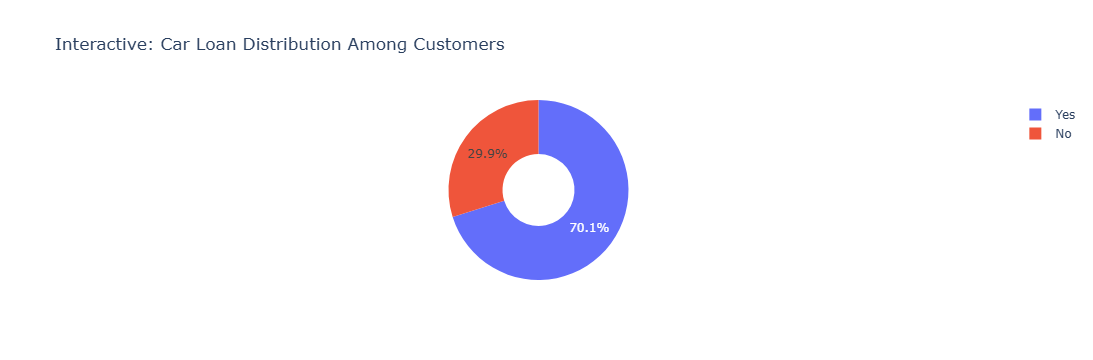

In [21]:
# Count loan status
loan_counts = df['Loan Taken'].value_counts().reset_index()
loan_counts.columns = ['Loan Taken', 'Number of Customers']

# Create interactive pie chart
fig = px.pie(
    loan_counts,
    names='Loan Taken',
    values='Number of Customers',
    title='Interactive: Car Loan Distribution Among Customers',
    hole=0.4  # donut-style
)

# Save the chart
fig.write_image("Loan Taken Pie Chart.png", width=800, height=600, scale=2)

# Show chart
fig.show()

## Q5. Gender-wise car brand preference:

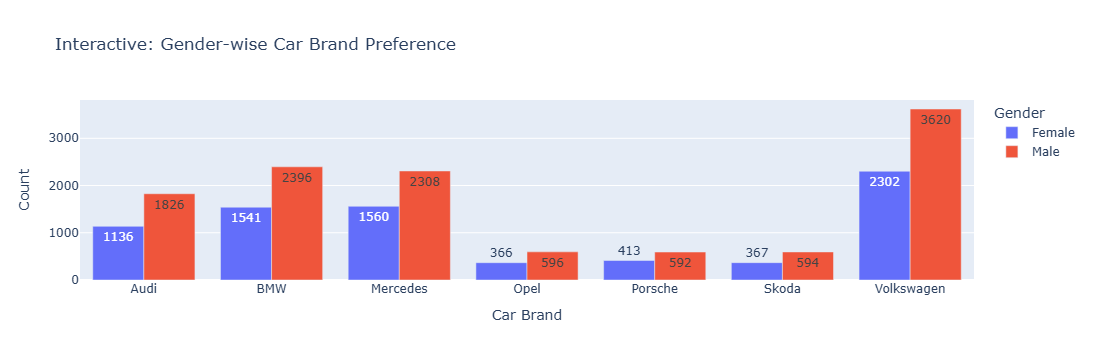

In [47]:
# Group by Car Brand and Gender
gender_brand = df.groupby(['Car Brand', 'Gender']).size().reset_index(name='Count')

# Create an interactive grouped bar chart using Plotly
fig = px.bar(
    gender_brand,                       
    x='Car Brand',                       
    y='Count',                           
    color='Gender',                      
    barmode='group',                    
    title='Interactive: Gender-wise Car Brand Preference',
    text='Count'                         # Show count values on bars
)

# Save as high-res PNG
fig.write_image("Gender-Wise Car Brand Preference.png", width=1000, height=600, scale=2)

# Display the Visual
fig.show()

## Q6. Age-wise customer segmentation:

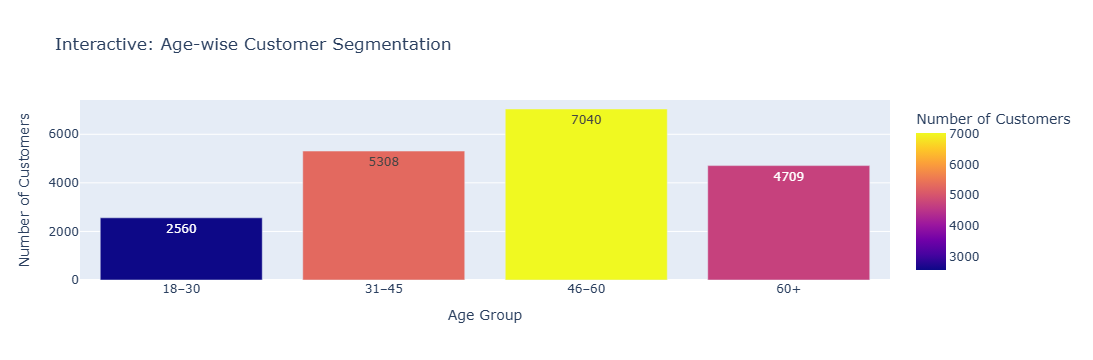

In [55]:
# Define bins and labels for age segmentation
bins = [17, 30, 45, 60, df['Age'].max()]  # use 17 to include 18 and use max age dynamically
labels = ['18–30', '31–45', '46–60', '60+']

# Create a new column 'Age Group' based on bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Count customers in each age group
age_group_counts = df['Age Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age Group', 'Number of Customers']

fig = px.bar(
    age_group_counts,
    x='Age Group',
    y='Number of Customers',
    title='Interactive: Age-wise Customer Segmentation',
    text='Number of Customers',
    color='Number of Customers'
)

# Save the Visual
fig.write_image("Age-wise Customer Segmentation.png", width=900, height=600, scale=2)

# Show the Visual
fig.show()

## Q7. Customer satisfaction distribution:

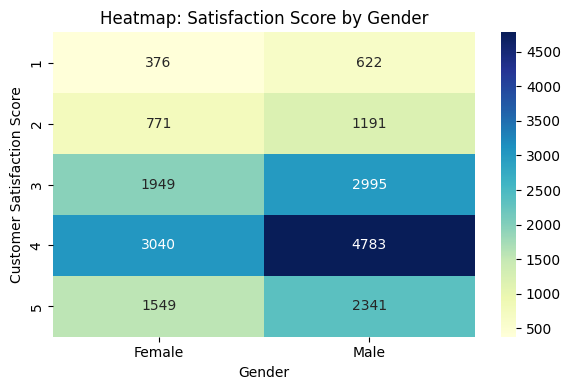

In [61]:
# Pivot the data: Satisfaction vs Gender
heat_data = df.pivot_table(
    index='Customer Satisfaction Score',
    columns='Gender',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(6, 4))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Heatmap: Satisfaction Score by Gender")
plt.tight_layout()

#Save the visual
plt.savefig("Heatmap Satisfaction By Gender.png", dpi=300)

# Show the visual
plt.show()